# Polish tweets annotations

In [1]:
import pickle
from os.path import join

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path = join("../data/wust_2k20_twitter_emotion_annotations.json")

In [3]:
df = pd.read_json(path)
df.head()

,annotation_1,annotation_2,annotation_3,id,most_common_annotation,num_different_annotations,num_total_annotations,tweet
0,neutralne,neutralne,neutralne,1320158927217197056,neutralne,1.0,3,Miesięczny (30 dni) przyrost zgonów na #korona...
1,neutralne,neutralne,neutralne,1196353360284332032,neutralne,1.0,3,#WROCŁAWAktualna #MAPA korków przekraczających...
2,radosc,neutralne,neutralne,281016917563682816,neutralne,2.0,3,Wigilię w @krecisie czas zacząć #christmas #św...
3,smutek,neutralne,smutek,1319551055424794624,smutek,2.0,3,Dzisiaj szału nie będzie. Nie bez powodu robi ...
4,podziw,podziw,podziw,1314223009431982080,podziw,1.0,3,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...


# Three annotations

## Three same annotations

In [4]:
three_annotations_one_emotion_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 1)] 

f"{len(three_annotations_one_emotion_df)} tweets with 3 annotations and 1 emotion"

'2235 tweets with 3 annotations and 1 emotion'

## Two same one different

In [5]:
three_annotations_two_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 2)] 


f"{len(three_annotations_two_emotions_df)} tweets with 3 annotations and 2 emotions"

'1852 tweets with 3 annotations and 2 emotions'

## All three different

In [6]:
three_annotations_three_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 3)] 


f"{len(three_annotations_three_emotions_df)} tweets with 3 annotations and 3 emotions"

'542 tweets with 3 annotations and 3 emotions'

# Two annotations

## Two same annotations

In [7]:
two_annotations_one_emotion_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 1)]  


f"{len(two_annotations_one_emotion_df)} tweets with 2 annotations and 1 emotion"

'124 tweets with 2 annotations and 1 emotion'

## Two different annotations 

In [8]:
two_annotations_two_emotions_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 2)]  


f"{len(two_annotations_two_emotions_df)} tweets with 2 annotations and 2 emotions"

'50 tweets with 2 annotations and 2 emotions'

# Single annotation

In [9]:
one_annotation_df = df[df.num_total_annotations == 1] 

f"{len(one_annotation_df)} tweets with 1 annotations and 1 emotion"

'232 tweets with 1 annotations and 1 emotion'

# No annotation

In [10]:
no_annotation_df = df[df.num_total_annotations == 0] 

f"{len(no_annotation_df)} tweets without an annotation"

'366 tweets without an annotation'

## Sum of lengths of subsets of annotation

In [11]:
len(three_annotations_one_emotion_df) + len(three_annotations_two_emotions_df) + len(three_annotations_three_emotions_df) + len(two_annotations_one_emotion_df) + len(two_annotations_two_emotions_df) + len(one_annotation_df) + len(no_annotation_df)

5401

# EDA

In [12]:
frames = [three_annotations_one_emotion_df, three_annotations_two_emotions_df, two_annotations_one_emotion_df]

reliable_df = pd.concat(frames)
# reliable_df = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df)

4211

In [13]:
reliable_df.most_common_annotation.value_counts()

neutralne      2587
zlosc           464
radosc          414
podziw          258
oczekiwanie     139
wstret          118
smutek          103
strach           65
zaskoczenie      63
Name: most_common_annotation, dtype: int64

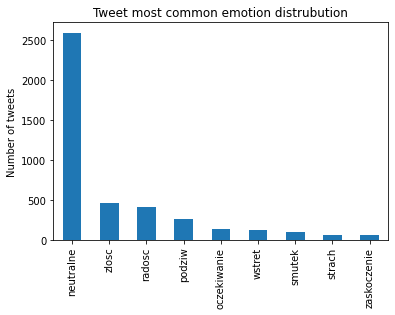

In [14]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution")
plt.ylabel("Number of tweets")
reliable_df['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [15]:
reliable_df_without_neutral = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df_without_neutral)

1624

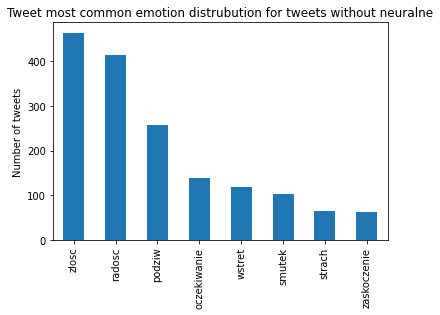

In [16]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution for tweets without neuralne")
plt.ylabel("Number of tweets")
reliable_df_without_neutral['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [17]:
reliable_df.head(5)

,annotation_1,annotation_2,annotation_3,id,most_common_annotation,num_different_annotations,num_total_annotations,tweet
0,neutralne,neutralne,neutralne,1320158927217197056,neutralne,1.0,3,Miesięczny (30 dni) przyrost zgonów na #korona...
1,neutralne,neutralne,neutralne,1196353360284332032,neutralne,1.0,3,#WROCŁAWAktualna #MAPA korków przekraczających...
4,podziw,podziw,podziw,1314223009431982080,podziw,1.0,3,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...
9,neutralne,neutralne,neutralne,761195490746703872,neutralne,1.0,3,3 typowe błędy w kryzysie w mediach społecznoś...
10,neutralne,neutralne,neutralne,1320132810288566272,neutralne,1.0,3,Katowice. Dzisiaj kto będzie?#protestkobiet #p...


In [18]:
reliable_df = reliable_df.reset_index(drop=True)

In [19]:
final_df = reliable_df[["tweet", "most_common_annotation"]]
final_df = final_df.rename(columns={"tweet": "('text',)", "most_common_annotation": "('emotions',)"})
final_df.head()

,"('text',)","('emotions',)"
0,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne
1,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne
2,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw
3,3 typowe błędy w kryzysie w mediach społecznoś...,neutralne
4,Katowice. Dzisiaj kto będzie?#protestkobiet #p...,neutralne


In [21]:
train_df, test_df = train_test_split(final_df, test_size=0.3, random_state=42, stratify=final_df[["('emotions',)"]])

In [22]:
train_df_save_path = join("..", "data", "wust-train.json.gz")
train_df.to_json(train_df_save_path, compression="gzip")

test_df_save_path = join("..", "data", "wust-test.json.gz")
test_df.to_json(test_df_save_path, compression="gzip")